# Supervised Learning: Breast Cancer

- Diogo Santos (up202108747@fe.up.pt)
- Gonçalo Matos (up202108761@fe.up.pt)
- Luís Contreiras (up202108742@fe.up.pt)

### Bibliotecas importadas

In [194]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings

warnings.filterwarnings('ignore')

### Análise exploratória dos dados

In [195]:
df = pd.read_csv('../data/data.csv')  # Carregar o conjunto
df.shape  # Dimensões do conjunto

(569, 32)

O nosso conjunto de dados inicial apresenta 569 diagnósticos diferentes de cancro da mama.
Por cada diagnóstico, existem 32 colunas de variáveis para analisar, todas numéricas com exceção do resultado do diagnóstico ("M"/"B"), que é a nossa variável objetivo.

Vamos verificar se faltam dados em algum caso:

In [196]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

Para entender um bocado melhor os valores com os quais estamos a lidar, podemos explorar o resumo estatístico do nosso conjunto:

In [197]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Verificámos que a coluna "id" é irrelevante para o nosso problema, por isso vamos removê-la:

In [198]:
df = df.drop("id", axis='columns')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Agora vamos converter todas as variáveis categóricas em numéricas. No nosso caso, como já mencionámos na etapa passada, a única variável não numérica que temos é o resultado do diagnóstico.

In [199]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Agora que temos o conjunto pronto para trabalhar, podemos comparar como as diferentes características se distribuem caso o diagnóstico seja maligno ou benigno:

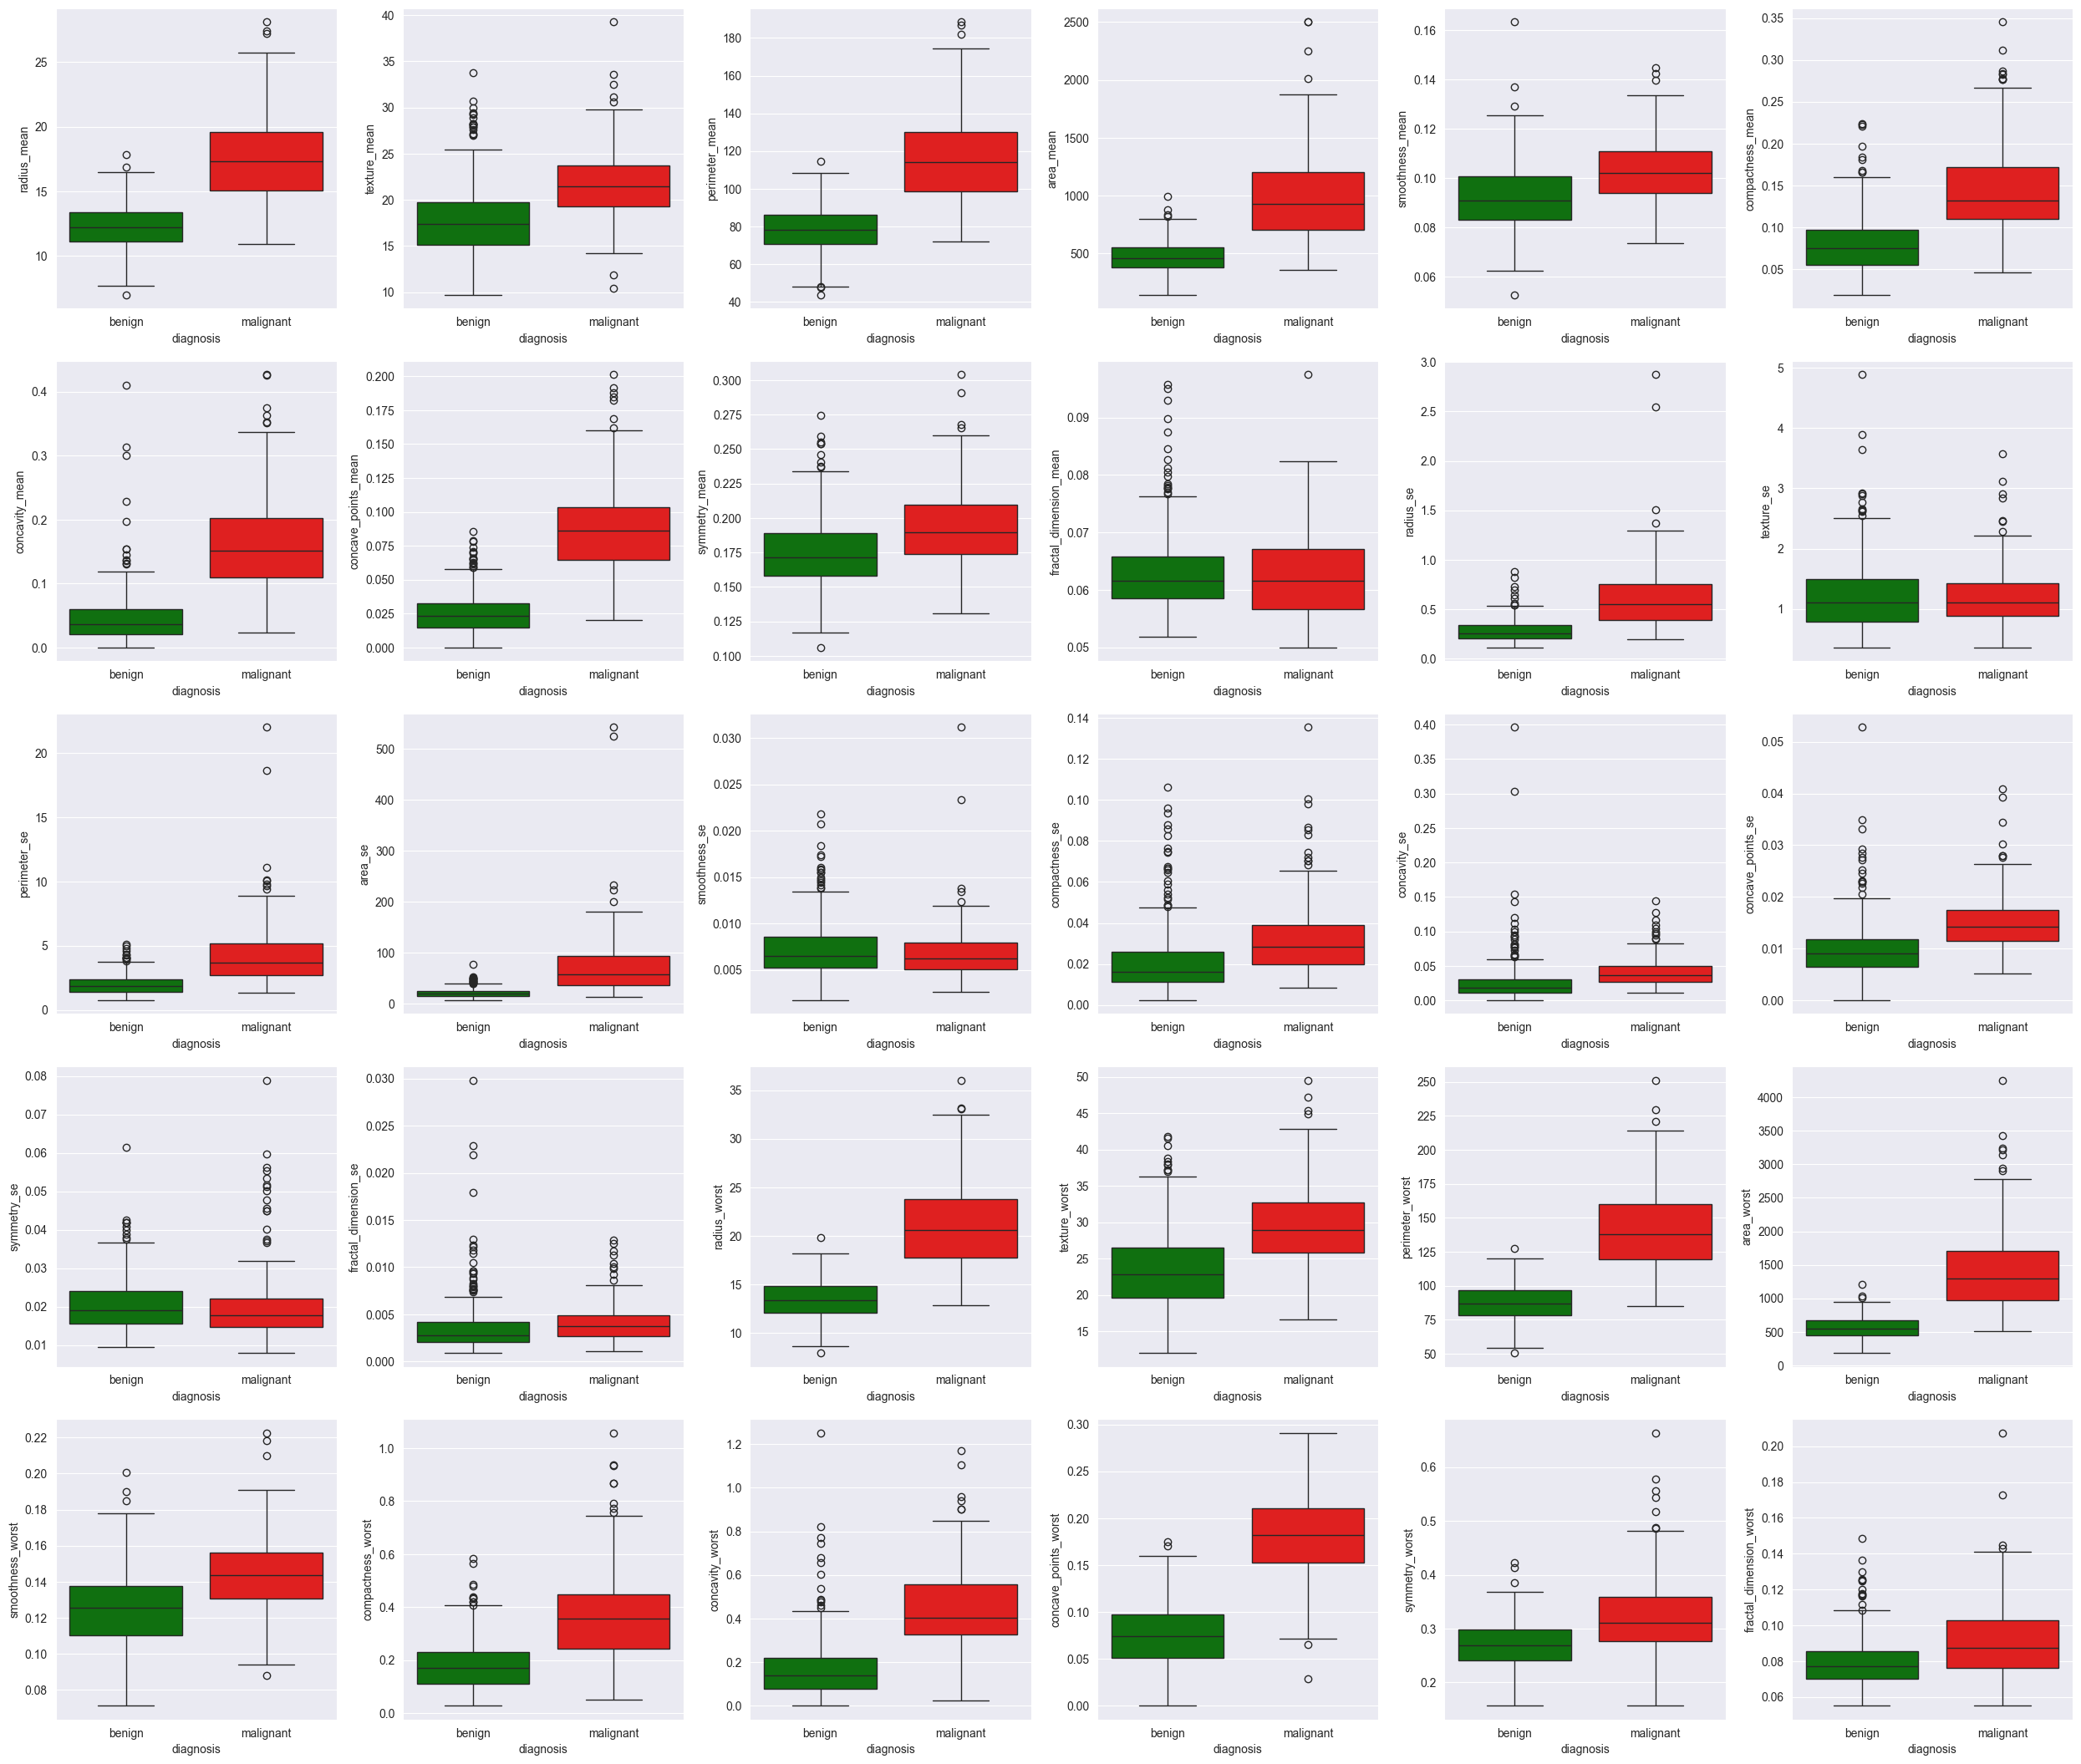

In [200]:
benign = df[df['diagnosis'] == 0]  # Buscar os casos em que o diagnóstico foi benigno
malignant = df[df['diagnosis'] == 1]  # Buscar os casos em que o diagnóstico foi maligno

columns = df.columns[1:]  # Buscar todas as colunas exceto "diagnosis"

plt.figure(figsize=(25, 25))

for i, col in enumerate(columns):
    plt.subplot(6, 6, i + 1)
    sb.boxplot(x='diagnosis', y=col, data=df, palette={'0': 'green', '1': 'red'})
    plt.xticks(ticks=[0, 1], labels=['benign', 'malignant'])

plt.tight_layout()
plt.show()

Outra maneira que temos para analisar estas distribuições e entender quais são as variáveis que influenciam mais no diagnóstico é dar plot à matriz de correlação.
Podemos reparar que existem 15 características com um valor de correlação com o diagnóstico acima de 0,50:

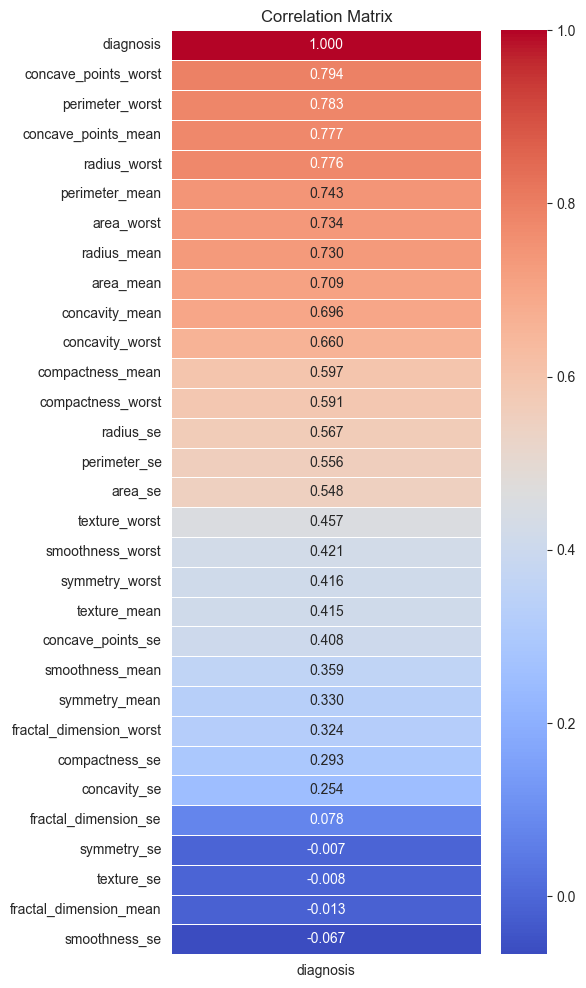

In [201]:
correlation_matrix = df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)

plt.figure(figsize=(5, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

### Treino e teste dos dados

Vamos dividir os nossos dados em 2 conjuntos, um para treino (80%) e outro para testes (20%):

In [202]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pré-processamento dos dados

De maneira a que todas as variáveis fiquem com um valor entre [0, 1], vamos normalizar os dados. Desta maneira preservamos as relações relativas entre os dados e mantemos a forma original da distribuição.

In [203]:
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelos

Os métodos de aprendizagem supervisionada que vamos utilizar são: Decision Trees, Neural Networks, K-NN e SVM:

In [204]:
decision_tree = DecisionTreeClassifier()
neural_network = MLPClassifier()
knn = KNeighborsClassifier()
svc = SVC(kernel='linear')

### Encaixar os dados nos modelos e correr as previsões

Vamos agora inserir os dados processados nos modelos e correr os algoritmos:

In [205]:
decision_tree.fit(X_train, y_train)
neural_network.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_nn = neural_network.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)

### Análise dos resultados

Comparar as precisões:

In [206]:
accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)
accuracy_neural_network = accuracy_score(y_test, y_pred_nn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy for Decision Tree: {accuracy_decision_tree:.4f}")
print(f"Accuracy for Neural Network: {accuracy_neural_network:.4f}")
print(f"Accuracy for KNN: {accuracy_knn:.4f}")
print(f"Accuracy for SVC: {accuracy_svc:.4f}")

Accuracy for Decision Tree: 0.9298
Accuracy for Neural Network: 0.9298
Accuracy for KNN: 0.9298
Accuracy for SVC: 0.8684


O modelo da Neural Network foi o mais preciso, vamos analisar os resultados que ele obteve em mais detalhe.
O seu relatório de classificação:

In [207]:
report = classification_report(y_test, y_pred_nn, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8987    1.0000    0.9467        71
           1     1.0000    0.8140    0.8974        43

    accuracy                         0.9298       114
   macro avg     0.9494    0.9070    0.9221       114
weighted avg     0.9369    0.9298    0.9281       114



A sua matriz de confusão:

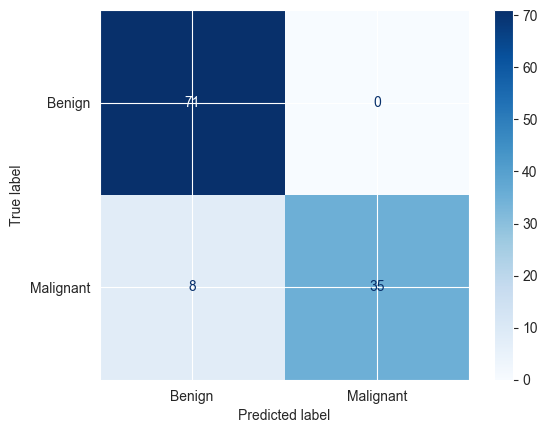

In [208]:
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nn, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')  
plt.show()

Após análise:
- 71 verdadeiros benignos
- 0 falsos benignos
- 36 verdadeiros malignos
- 7 falsos malignos